In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("vaccine-preventable-disease-cases-by-county-and-year.csv")
df

,disease,county,year,#dead
0,Diphtheria,Alameda,2017,0
1,Diphtheria,Alpine,2017,0
2,Diphtheria,Amador,2017,0
3,Diphtheria,Butte,2017,0
4,Diphtheria,Calaveras,2017,0
5,Diphtheria,California,2017,0
6,Diphtheria,Colusa,2017,0
7,Diphtheria,Contra Costa,2017,0
8,Diphtheria,Del Norte,2017,0
9,Diphtheria,El Dorado,2017,0


In [3]:
list(df.columns)

['disease', 'county', 'year', '#dead']

In [4]:
df = df[df['disease'].isin(['Measles'])]

In [5]:
df.head()

,disease,county,year,#dead
295,Measles,Alameda,2017,0
296,Measles,Alpine,2017,0
297,Measles,Amador,2017,0
298,Measles,Butte,2017,0
299,Measles,Calaveras,2017,0


In [6]:
df2 = pd.read_csv("childcare2016-17to2017-18_with_annotations.csv")
df2.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,YEAR,SCHOOL_YEAR,COUNTY,CITY,ENROLLMENT,CATEGORY,PERCENT VACCINATED
0,2017,2017-2018,SAN MATEO,BELMONT,35.0,UP-TO-DATE,95
1,2017,2017-2018,SAN MATEO,BELMONT,35.0,CONDITIONAL,5
2,2017,2017-2018,SAN MATEO,BELMONT,35.0,DTP,95
3,2017,2017-2018,SAN MATEO,BELMONT,35.0,HEPB,95
4,2017,2017-2018,SAN MATEO,BELMONT,35.0,HIB,95


In [7]:
df2 = df2[df2['CATEGORY'].isin(['MMR'])]
df2.head()

,YEAR,SCHOOL_YEAR,COUNTY,CITY,ENROLLMENT,CATEGORY,PERCENT VACCINATED
5,2017,2017-2018,SAN MATEO,BELMONT,35.0,MMR,95
17,2017,2017-2018,SAN MATEO,SAN MATEO,22.0,MMR,95
29,2017,2017-2018,SAN MATEO,EMERALD HILLS,68.0,MMR,96
41,2017,2017-2018,SAN MATEO,ATHERTON,32.0,MMR,95
53,2017,2017-2018,SAN MATEO,SOUTH SAN FRANCISCO,34.0,MMR,95


In [8]:
#df2.groupby(['COUNTY','SCHOOL_YEAR']).size().reset_index().groupby('PERCENT')[[0]].avg()
df2['PERCENT VACCINATED'] = df2['PERCENT VACCINATED'].apply(pd.to_numeric, errors = 'coerce')
df2 = df2.groupby(['COUNTY','YEAR']).agg({'PERCENT VACCINATED':'mean'})
df2.head()

PERCENT VACCINATED
COUNTY  YEAR                    
ALAMEDA 2016           95.870324
        2017           95.515152
ALPINE  2016                 NaN
        2017                 NaN
AMADOR  2016           92.000000

In [9]:
dfmerged = pd.merge(df, df2, how='left', left_on='year', right_on='YEAR')
dfmerged.head()

,disease,county,year,#dead,PERCENT VACCINATED
0,Measles,Alameda,2017,0,95.515152
1,Measles,Alameda,2017,0,NaN
2,Measles,Alameda,2017,0,93.333333
3,Measles,Alameda,2017,0,94.888889
4,Measles,Alameda,2017,0,95.000000


In [10]:
dfmerged2 = dfmerged.dropna(how='any')
dfmerged2.describe()

,year,#dead,PERCENT VACCINATED
count,6667.000000,6667.000000,6667.000000
mean,2016.495575,0.662367,94.607991
std,0.500018,3.092023,2.039389
min,2016.000000,0.000000,81.000000
25%,2016.000000,0.000000,94.400000
50%,2016.000000,0.000000,95.062500
75%,2017.000000,0.000000,95.757576
max,2017.000000,24.000000,96.381579


In [11]:
X = dfmerged2["#dead"].values.reshape(-1, 1)
y = dfmerged2["PERCENT VACCINATED"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (6667, 1) (6667, 1)


Text(0, 0.5, 'PERCENT VACCINATED')

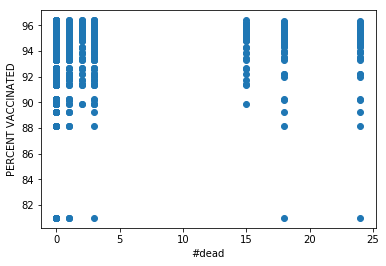

In [12]:
# Plot the data to see if a linear trend exists
### BEGIN SOLUTION
plt.scatter(X, y)
plt.xlabel("#dead")
plt.ylabel("PERCENT VACCINATED")
### END SOLUTION

In [13]:
# Use sklearn's `train_test_split` to split the data into training and testing

from sklearn.model_selection import train_test_split

### BEGIN SOLUTION

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [14]:
# Create the model

### BEGIN SOLUTION

from sklearn.linear_model import LinearRegression

model = LinearRegression()

### END SOLUTION

In [15]:
# Fit the model to the training data. 

### BEGIN SOLUTION

model.fit(X_train, y_train)

### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

### END SOLUTION

Mean Squared Error (MSE): 3.9402533504303396
R-squared (R2 ): -0.0013098542906477828


In [17]:
# Call the `score` method on the model to show the r2 score

### BEGIN SOLUTION
model.score(X_test, y_test)
### END SOLUTION

-0.0013098542906477828